Again using tensorflow/Keras for text generation.
This time a word based model.
Following and adjusting to an official Tensorflow Tutorial on their youtube channel https://www.youtube.com/watch?v=ZMudJXhsUpY&t=376s

In [ ]:
#importing the necessary libaries
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

Tokenizing the text

In [ ]:
tokenizer = Tokenizer()

data = open('/content/Goethe_all.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'und': 1, 'die': 2, 'der': 3, 'ich': 4, 'das': 5, 'sie': 6, 'zu': 7, 'nicht': 8, 'sich': 9, 'du': 10, 'den': 11, 'so': 12, 'ein': 13, 'es': 14, 'in': 15, 'dem': 16, 'wie': 17, 'ist': 18, 'mit': 19, 'er': 20, 'mir': 21, 'mich': 22, 'was': 23, 'im': 24, 'doch': 25, 'auf': 26, 'ihr': 27, 'von': 28, 'an': 29, 'nur': 30, '«': 31, 'dich': 32, 'da': 33, 'des': 34, 'auch': 35, 'wenn': 36, 'wir': 37, 'nun': 38, 'dir': 39, 'uns': 40, 'denn': 41, 'als': 42, 'man': 43, 'nach': 44, 'daß': 45, 'zum': 46, 'noch': 47, 'aber': 48, 'aus': 49, 'wird': 50, 'mein': 51, 'immer': 52, 'am': 53, 'sind': 54, 'wohl': 55, 'ihn': 56, 'sein': 57, 'war': 58, 'euch': 59, 'alles': 60, 'ihm': 61, 'hat': 62, 'hier': 63, 'o': 64, 'ach': 65, 'schon': 66, 'leben': 67, 'liebe': 68, 'wo': 69, 'vom': 70, 'wer': 71, 'vor': 72, 'will': 73, 'alle': 74, 'zur': 75, 'um': 76, 'durch': 77, 'wieder': 78, 'für': 79, 'welt': 80, 'dann': 81, 'gleich': 82, 'selbst': 83, 'soll': 84, 'sei': 85, 'eine': 86, 'kann': 87, 'nichts': 88, 'mehr'

Pading the data

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

In [ ]:
print(xs[6])

In [ ]:
print(ys[6])

In [ ]:
print(xs[5])
print(ys[5])

In [ ]:
print(tokenizer.word_index)

Creating,fitting and training the model

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
2492/2492 [==============================] - 99s 40ms/step - loss: 7.6437 - accuracy: 0.0415
Epoch 2/100
2492/2492 [==============================] - 100s 40ms/step - loss: 6.8954 - accuracy: 0.0633
Epoch 3/100
2492/2492 [==============================] - 100s 40ms/step - loss: 6.0619 - accuracy: 0.0843
Epoch 4/100
2492/2492 [==============================] - 99s 40ms/step - loss: 5.3049 - accuracy: 0.1170
Epoch 5/100
2492/2492 [==============================] - 98s 39ms/step - loss: 4.8052 - accuracy: 0.1510
Epoch 6/100
2492/2492 [==============================] - 98s 39ms/step - loss: 4.5049 - accuracy: 0.1756
Epoch 7/100
2492/2492 [==============================] - 100s 40ms/step - loss: 4.2910 - accuracy: 0.1956
Epoch 8/100
2492/2492 [==============================] - 99s 40ms/step - loss: 4.1452 - accuracy: 0.2092
Epoch 9/100
2492/2492 [==============================] - 97s 39ms/step - loss: 4.0120 - accuracy: 0.2239
Epoch 10/100
2492/2492 [============================

In [ ]:
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
2492/2492 [==============================] - 96s 39ms/step - loss: 3.0076 - accuracy: 0.4060
Epoch 2/100
2492/2492 [==============================] - 95s 38ms/step - loss: 2.9727 - accuracy: 0.4064
Epoch 3/100
2492/2492 [==============================] - 96s 38ms/step - loss: 2.9735 - accuracy: 0.4089
Epoch 4/100
2492/2492 [==============================] - 95s 38ms/step - loss: 2.9503 - accuracy: 0.4093
Epoch 5/100
2492/2492 [==============================] - 95s 38ms/step - loss: 2.9321 - accuracy: 0.4101
Epoch 6/100
2492/2492 [==============================] - 95s 38ms/step - loss: 2.9432 - accuracy: 0.4121
Epoch 7/100
2492/2492 [==============================] - 96s 39ms/step - loss: 2.9394 - accuracy: 0.4115
Epoch 8/100
2492/2492 [==============================] - 96s 39ms/step - loss: 2.9425 - accuracy: 0.4104
Epoch 9/100
2492/2492 [==============================] - 95s 38ms/step - loss: 3.0086 - accuracy: 0.4061
Epoch 10/100
2492/2492 [==============================]

Mapping the accuracy over epochs

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

Saving the model

In [ ]:
model.save("Goethe.model3")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Goethe.model3/assets


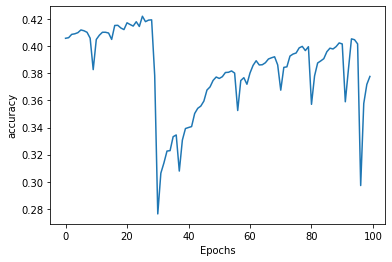

In [ ]:
plot_graphs(history, 'accuracy')


The graph shows that the mode is overtrained.
The graph shows Epochs 101-200
So I will be using the model after epoch 100 since it is saved

Text Generation with and without a prompt text

In [ ]:
seed_text = "Wie kannst du nur"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Wie kannst du nur scheeles daran freude werd ich eile sobald und sprühn spaße
